# EDA and Data Processing

## Libraries

In [1]:
# Data Cleaning
from dateutil.relativedelta import relativedelta # To calculate month diff
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations

# Data Visualisation
import matplotlib.pyplot as plt  # General plotting
import seaborn as sns  # Advanced statistical visualizations

## Loading the datasets
Data from 2012 to 2025 are loaded in. These transactions are recorded based on registration date.

In [2]:
# Load both datasets

url1 = "https://raw.githubusercontent.com/MinAungOo64/CS3244/refs/heads/main/Resale%20Flat%20Prices%20(Based%20on%20Registration%20Date)%2C%20From%20Mar%202012%20to%20Dec%202014.csv"
url2 = "https://raw.githubusercontent.com/MinAungOo64/CS3244/refs/heads/main/Resale%20Flat%20Prices%20(Based%20on%20Registration%20Date)%2C%20From%20Jan%202015%20to%20Dec%202016.csv"
url3 = "https://raw.githubusercontent.com/MinAungOo64/CS3244/refs/heads/main/Resale%20flat%20prices%20based%20on%20registration%20date%20from%20Jan-2017%20onwards.csv"

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)

## Column Inspection

In [3]:
print("Columns in dataset 1:", df1.columns)
print("Columns in dataset 2:", df2.columns)
print("Columns in dataset 3:", df3.columns)

Columns in dataset 1: Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Columns in dataset 2: Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')
Columns in dataset 3: Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')


In [4]:
df1.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0


In [5]:
df2.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0


In [6]:
df3.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0


## Dropping remaining_lease
remaining_lease will be recalculated later on with lease_commence_date for standardisation

In [7]:
df2 = df2.drop(columns=['remaining_lease'])
df3 = df3.drop(columns=['remaining_lease'])

## Merging Dataframes

In [8]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0


## Check for missing values

In [9]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

## Check for duplicates

In [10]:
# Check for duplicates in the entire DataFrame
duplicates = df.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop duplicates (keeping the first occurrence)
df = df.drop_duplicates()

# Reset the index
df = df.reset_index(drop=True)

Number of duplicate rows: 657


## Convert to Date-Time

In [11]:
df['month'] = pd.to_datetime(df['month'])
df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date'], format='%Y')
df.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986-01-01,250000.0
1,2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980-01-01,265000.0
2,2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980-01-01,315000.0


## Resale Price over the years
It is observed that the resale prices surged after covid-19.

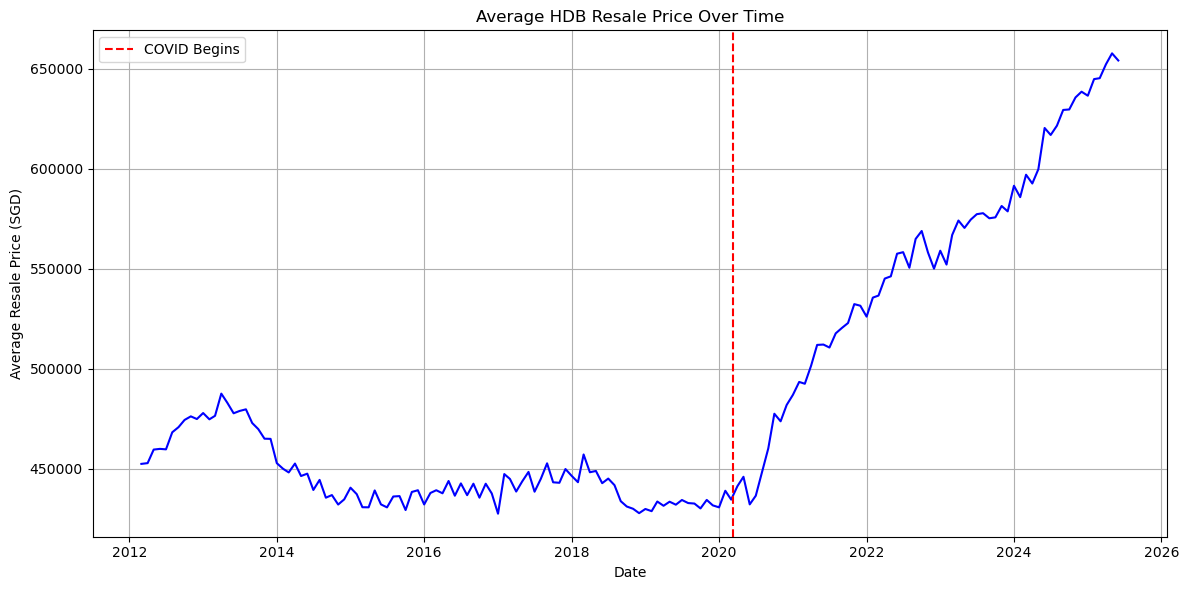

In [12]:
# Group by month to get average resale prices
monthly_avg = df.groupby('month')['resale_price'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['month'], monthly_avg['resale_price'], color='blue')
plt.title('Average HDB Resale Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Resale Price (SGD)')
plt.grid(True)
plt.tight_layout()
plt.axvline(pd.to_datetime('2020-03-11'), color='red', linestyle='--', label='COVID Begins')
plt.legend()
plt.show()

## New Features for Date-Time Features  
Regression models do not handle date-time features well, instead we engineer new features that represent time-based differences in a numerical format.

In [13]:
# Function to calculate year difference between two dates
def years_difference(start_date, end_date):
    delta = relativedelta(end_date, start_date)
    return delta.years

# Function to calculate month difference between two dates
def months_difference(start_date, end_date):
    delta = relativedelta(end_date, start_date)
    return delta.years * 12 + delta.months

start = pd.to_datetime('1990-01-01')
end = pd.to_datetime('2024-06-15')
print(years_difference(start, end))

34


### remaining_lease
We will calculate the remaining_lease at the time of resale since we want to predict the resale price at the time of resale

In [14]:
df['remaining_lease'] = df.apply(
    lambda x: 99 - years_difference(x['lease_commence_date'], x['month']),
    axis=1
)
df.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2012-03-01,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986-01-01,250000.0,73
1,2012-03-01,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980-01-01,265000.0,67
2,2012-03-01,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980-01-01,315000.0,67


## months_since_base
The month column records the date of each resale transaction. We set the earliest transaction date, 2012-03-01, as the baseline. Using this baseline, we calculate the number of months elapsed between the earliest transaction and each subsequent transaction.

This time-based feature helps the model capture market trends and inflation effects over time. For example, the model can learn that resale prices generally increase as the time since the baseline grows.

In [15]:
# Define baseline date
baseline_date = pd.to_datetime('2012-03-01')

df['months_since_base'] = df.apply(
    lambda x: months_difference(baseline_date, x['month']),
    axis=1
)

## Correlation of numerical features

The highest correlation (0.59) is between floor_area and resale_price.

In [16]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]

# Compute Pearson correlation matrix
correlation_matrix = df_numerical.corr()

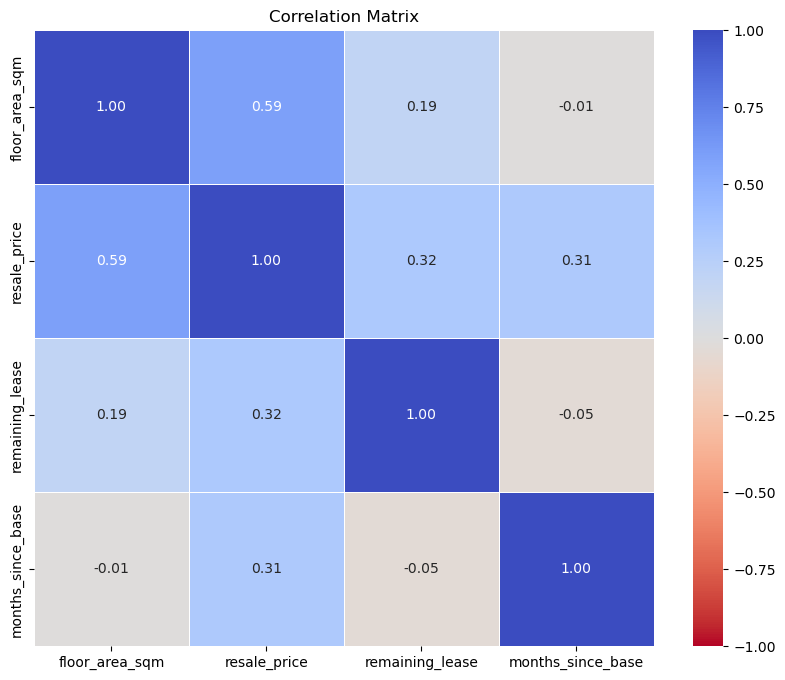

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt='.2f',
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Distribution / Histogram of numerical features

resale_price and floor_area_sqm have similar distribution (right skewed).  
This is expected where a few premium properties with larger floor areas have high prices.

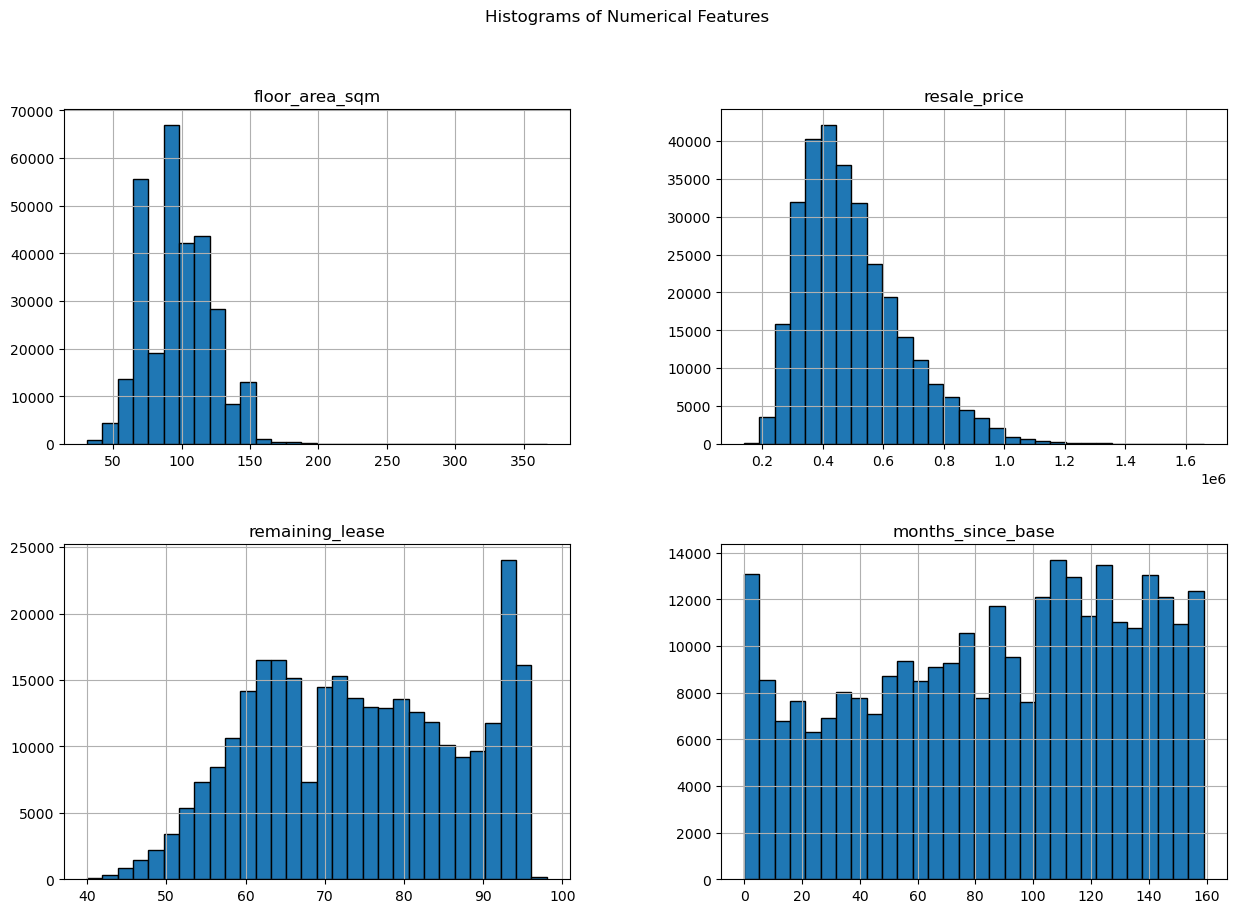

In [18]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]

# Plot histograms for all numerical columns
df_numerical.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

## Assessing resale_price and floor_area_sqm

The correlation coefficient between resale_price and floor_area_sqm is relatively low (0.59) implying that they do not have a perfect linear relationship.  
After the log transformation, the correlation coefficient increased to 0.65.  
The log transformation reduced the impact of extreme values (outliers) and helped normalize the distribution, making the correlation more representative of the general trend.

In [19]:
# Apply log transformation
df['log_resale_price'] = np.log(df['resale_price'])
df['log_floor_area_sqm'] = np.log(df['floor_area_sqm'])

# Recompute correlation
log_correlation = df[['log_resale_price', 'log_floor_area_sqm']].corr()
print(log_correlation)

                    log_resale_price  log_floor_area_sqm
log_resale_price            1.000000            0.652021
log_floor_area_sqm          0.652021            1.000000


## Inspecting unique values
There are too many unique values for block and street_name to do one-hot encoding.

In [20]:
# Count unique values for only categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
unique_counts_categorical = df[categorical_cols].nunique()
unique_counts_categorical

town              26
flat_type          7
block           2745
street_name      577
storey_range      25
flat_model        21
dtype: int64

## Boxplot of Categorial vs Resale Price

### Town
Town will be one-hot encoded

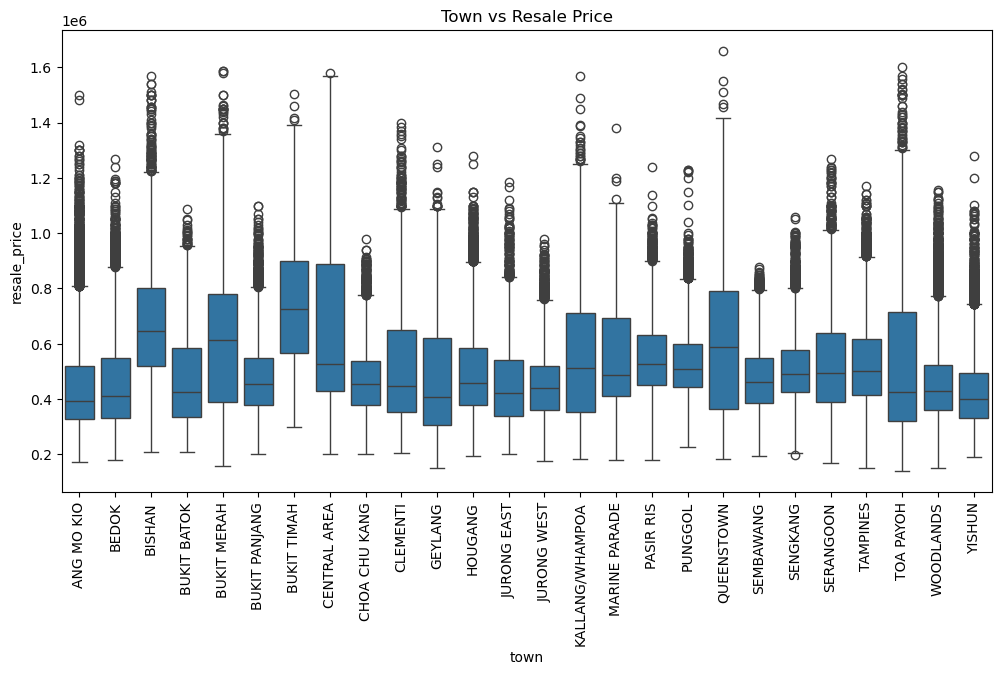

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='town', y='resale_price', data=df)
plt.title('Town vs Resale Price')
plt.xticks(rotation=90)
plt.show()

### Flat Type
Flat Type can be oridnally encoded

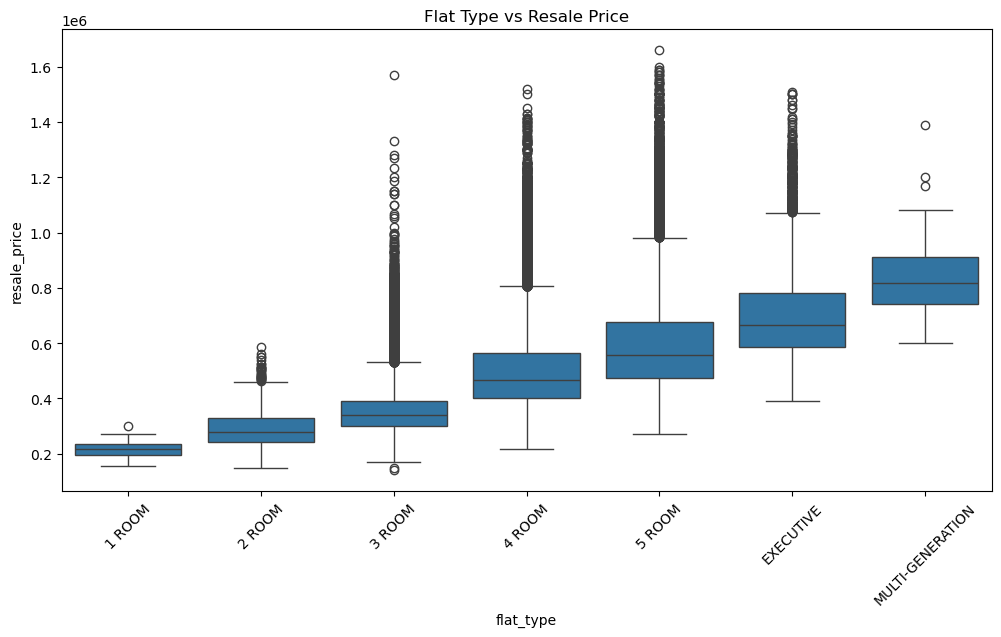

In [22]:
# Order the flat types
flat_type_order = [
    '1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'
]

df['flat_type'] = pd.Categorical(df['flat_type'], categories=flat_type_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x='flat_type', y='resale_price', data=df)
plt.title('Flat Type vs Resale Price')
plt.xticks(rotation=45)
plt.show()

### Storey Range
Higher stories are generally more expensive, we can apply ordinal encoding

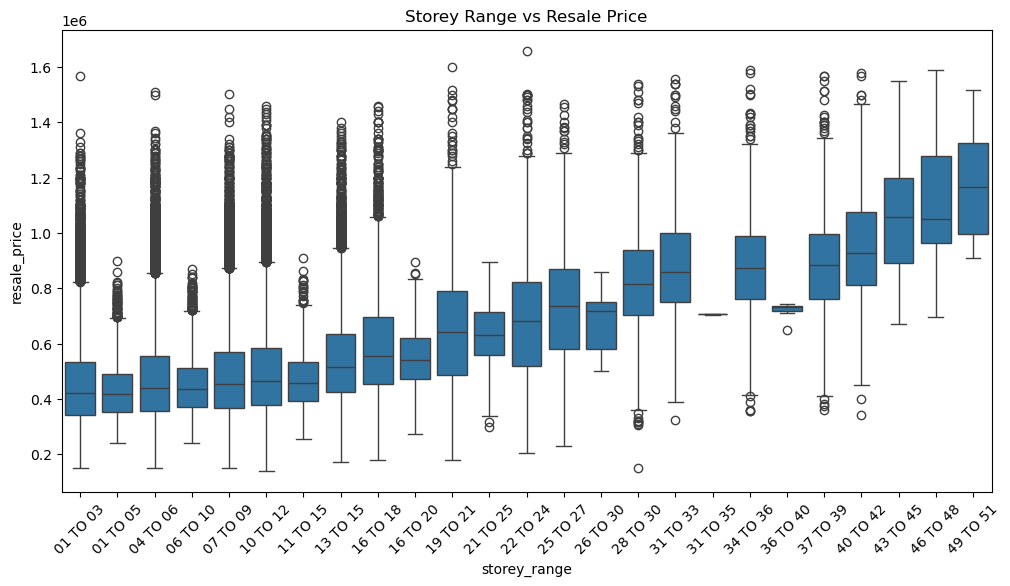

In [23]:
# Order the storey ranges
storey_order = [
    '01 TO 03', '01 TO 05', '04 TO 06', '06 TO 10', '07 TO 09', '10 TO 12', '11 TO 15',
    '13 TO 15', '16 TO 18', '16 TO 20', '19 TO 21', '21 TO 25', 
    '22 TO 24', '25 TO 27', '26 TO 30', '28 TO 30', '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40', '37 TO 39',
    '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51'
]

df['storey_range'] = pd.Categorical(df['storey_range'], categories=storey_order, ordered=True)


plt.figure(figsize=(12, 6))
sns.boxplot(x='storey_range', y='resale_price', data=df)
plt.title('Storey Range vs Resale Price')
plt.xticks(rotation=45)
plt.show()

### Flat Model
Flat Model will not be ordinally encoded due to unclear ranking

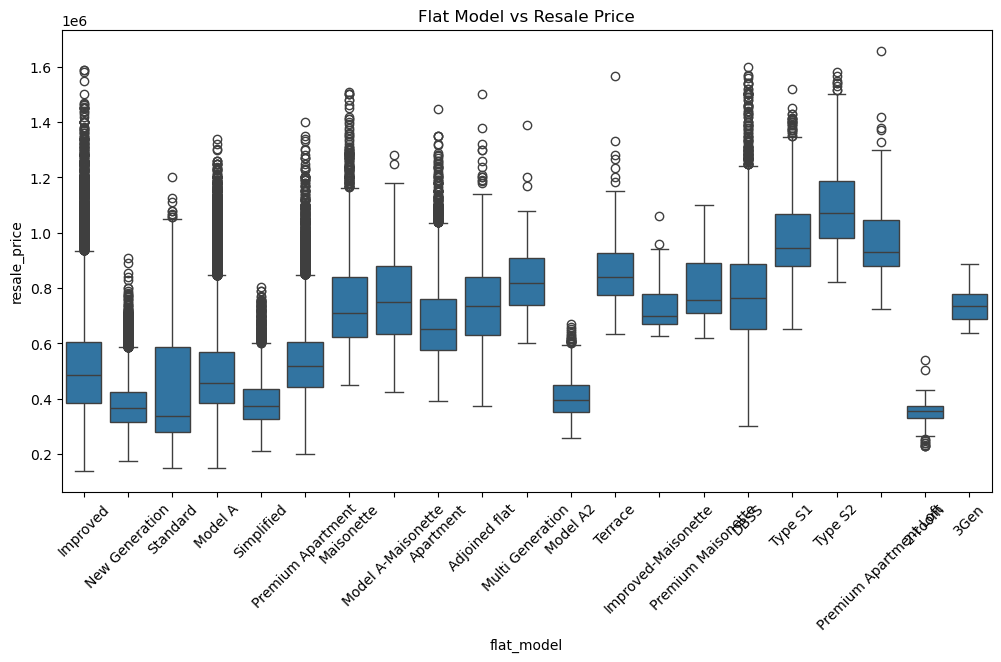

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='flat_model', y='resale_price', data=df)
plt.title('Flat Model vs Resale Price')
plt.xticks(rotation=45)
plt.show()

## Oridnal Encoding

In [25]:
# Define ordinal encoding for 'flat_type'
flat_type_order = {
    '1 ROOM': 1, '2 ROOM': 2, '3 ROOM': 3, '4 ROOM': 4,
    '5 ROOM': 5, 'EXECUTIVE': 6, 'MULTI-GENERATION': 7
}
df['flat_type_encoded'] = df['flat_type'].map(flat_type_order)

# Define ordinal encoding for 'storey_range'
storey_range_map = {val: idx + 1 for idx, val in enumerate(storey_order)}

df['storey_range_encoded'] = df['storey_range'].map(storey_range_map)

# Drop original categorical columns that were ordinally encoded
df = df.drop(columns=['flat_type', 'storey_range'])

## Dropping non-log features

In [26]:
df = df.drop(columns=['floor_area_sqm', 'resale_price'])

In [27]:
df.head(3)

,month,town,block,street_name,flat_model,lease_commence_date,remaining_lease,months_since_base,log_resale_price,log_floor_area_sqm,flat_type_encoded,storey_range_encoded
0,2012-03-01,ANG MO KIO,172,ANG MO KIO AVE 4,Improved,1986-01-01,73,0,12.429216,3.806662,2,4
1,2012-03-01,ANG MO KIO,510,ANG MO KIO AVE 8,Improved,1980-01-01,67,0,12.487485,3.784190,2,2
2,2012-03-01,ANG MO KIO,610,ANG MO KIO AVE 4,New Generation,1980-01-01,67,0,12.660328,4.219508,3,4


## Dropping street_name and block

Both features have too many unique values to be one-hot encoded  
Addtionally town serves already serves a location feature

In [28]:
df = df.drop(columns=['block', 'street_name'])

In [29]:
df.head(3)

,month,town,flat_model,lease_commence_date,remaining_lease,months_since_base,log_resale_price,log_floor_area_sqm,flat_type_encoded,storey_range_encoded
0,2012-03-01,ANG MO KIO,Improved,1986-01-01,73,0,12.429216,3.806662,2,4
1,2012-03-01,ANG MO KIO,Improved,1980-01-01,67,0,12.487485,3.784190,2,2
2,2012-03-01,ANG MO KIO,New Generation,1980-01-01,67,0,12.660328,4.219508,3,4


## Creating different dataframes
2 dataframes will be created, df_base which includes both pre-covid and post-covid data, df_post_covid which only includes data from post-covid period.

### df_base

In [30]:
df_base = df.copy()
df_base.drop(columns=['month', 'lease_commence_date'], inplace=True)

In [33]:
df_base.head(3)

,town,flat_model,remaining_lease,months_since_base,log_resale_price,log_floor_area_sqm,flat_type_encoded,storey_range_encoded
0,ANG MO KIO,Improved,73,0,12.429216,3.806662,2,4
1,ANG MO KIO,Improved,67,0,12.487485,3.784190,2,2
2,ANG MO KIO,New Generation,67,0,12.660328,4.219508,3,4


#### one-hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Select categorical columns to one-hot encode
cat_features = ['town', 'flat_model']
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids multicollinearity

# Perform one-hot encoding
encoded_features = one_hot_encoder.fit_transform(df_base[cat_features])

# Create DataFrame from encoded features with proper column names
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(cat_features))

# Ensure indices align for concatenation
encoded_df.index = df_base.index

# Concatenate encoded features back to df_base
df_base = pd.concat([df_base, encoded_df], axis=1)

# Drop original categorical columns that were one-hot encoded
df_base = df_base.drop(columns=cat_features)

In [37]:
df_base.head(3)

,remaining_lease,months_since_base,log_resale_price,log_floor_area_sqm,flat_type_encoded,storey_range_encoded,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,73,0,12.429216,3.806662,2,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,67,0,12.487485,3.784190,2,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67,0,12.660328,4.219508,3,4,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### df_post_covid

In [32]:
df_post_covid = df[df['month'] >= '2020-03-11'].copy()
df_post_covid.drop(columns=['month', 'lease_commence_date'], inplace=True)

In [34]:
df_post_covid.head(3)

,town,flat_model,remaining_lease,months_since_base,log_resale_price,log_floor_area_sqm,flat_type_encoded,storey_range_encoded
158624,ANG MO KIO,New Generation,60,97,12.513557,4.219508,3,1
158625,ANG MO KIO,New Generation,63,97,12.577636,4.204693,3,3
158626,ANG MO KIO,New Generation,58,97,12.337101,4.219508,3,1


#### one-hot encoding

In [38]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Select categorical columns to one-hot encode
cat_features = ['town', 'flat_model']
one_hot_encoder_post = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids multicollinearity

# Perform one-hot encoding on df_post_covid
encoded_features_post = one_hot_encoder_post.fit_transform(df_post_covid[cat_features])

# Create DataFrame from encoded features with proper column names
encoded_df_post = pd.DataFrame(encoded_features_post, columns=one_hot_encoder_post.get_feature_names_out(cat_features))

# Ensure indices align for concatenation
encoded_df_post.index = df_post_covid.index

# Concatenate encoded features back to df_post_covid
df_post_covid = pd.concat([df_post_covid, encoded_df_post], axis=1)

# Drop original categorical columns that were one-hot encoded
df_post_covid = df_post_covid.drop(columns=cat_features)

In [39]:
df_post_covid.head(3)

,remaining_lease,months_since_base,log_resale_price,log_floor_area_sqm,flat_type_encoded,storey_range_encoded,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,...,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
158624,60,97,12.513557,4.219508,3,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158625,63,97,12.577636,4.204693,3,3,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158626,58,97,12.337101,4.219508,3,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Save as Pickle to preserve data types

In [40]:
df_base.to_pickle('df_base.pkl')
df_post_covid.to_pickle('df_post_covid.pkl')